In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

iris_klastering = pd.read_csv('D:\\\\BelajarML\\\\praktikkum\\\\pertemuan3\\\\iris.csv', on_bad_lines='skip')
x = iris_klastering.iloc[:, [4]].values
iris_klastering

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [480]:
x

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [481]:
iris_klastering.dropna()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [482]:
iris_klastering[iris_klastering.duplicated()]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [483]:
iris_klastering = iris_klastering.drop_duplicates()
iris_klastering

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [484]:
print(iris_klastering.columns)
iris_klastering

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Menghapus kolom Spesies

In [485]:
iris_klastering = iris_klastering.drop(columns=['Species'])

In [486]:
iris_klastering

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [487]:
iris_klastering.isnull().sum()

SepalLength    0
SepalWidth     2
PetalLength    2
PetalWidth     0
dtype: int64

In [488]:
iris_klastering.dropna()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [489]:
iris_klastering.describe()

,SepalWidth,PetalLength,PetalWidth
count,145.000000,145.000000,147.000000
mean,3.055862,3.788276,1.208844
std,0.439993,1.757188,0.757874
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.400000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


# Membersihkan data yang NaN

In [490]:
iris_klastering['SepalLength'] = pd.to_numeric(iris_klastering['SepalLength'], errors='coerce')
iris_klastering = iris_klastering.dropna()
clean_iris_df = iris_klastering
clean_iris_df[clean_iris_df.duplicated()]

,SepalLength,SepalWidth,PetalLength,PetalWidth


# Features Scaling with Min Max Scaler 

In [491]:
from sklearn.preprocessing import StandardScaler

mms = StandardScaler()
clean_iris_df = mms.fit_transform(clean_iris_df)
clean_iris_df = pd.DataFrame(clean_iris_df, columns=iris_klastering.columns)
clean_iris_df

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.942789,1.000472,-1.380149,-1.359383
1,-1.184661,-0.143385,-1.380149,-1.359383
2,-1.426532,0.314158,-1.437319,-1.359383
3,-1.547468,0.085387,-1.322978,-1.359383
4,-1.063725,1.229244,-1.380149,-1.359383
...,...,...,...,...
137,0.992185,-0.143385,0.792337,1.424738
138,0.508442,-1.287242,0.677996,0.894429
139,0.750313,-0.143385,0.792337,1.027006
140,0.387506,0.771701,0.906679,1.424738


# Menentukan Nilai K dengan Elbow Method

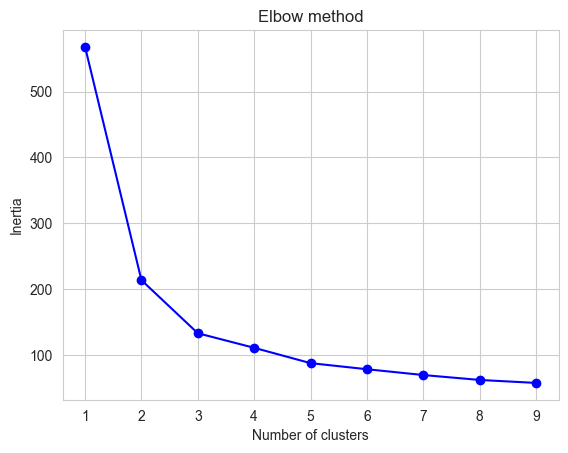

In [492]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(clean_iris_df)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.title('Elbow method')
plt.plot(range(1, 10), inertia, marker='o', c="blue")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [493]:
elbow_data = pd.DataFrame({"Inersia ": inertia, "Clusters": range(1, 10)})
elbow_data

,Inersia,Clusters
0,568.000000,1
1,213.543023,2
2,132.871679,3
3,110.708704,4
4,87.415875,5
5,78.171860,6
6,69.355131,7
7,61.880703,8
8,57.358911,9


# Membuat Bar plot untuk memvisualisasikan hasil optimal dengan Elbow 

<Axes: >

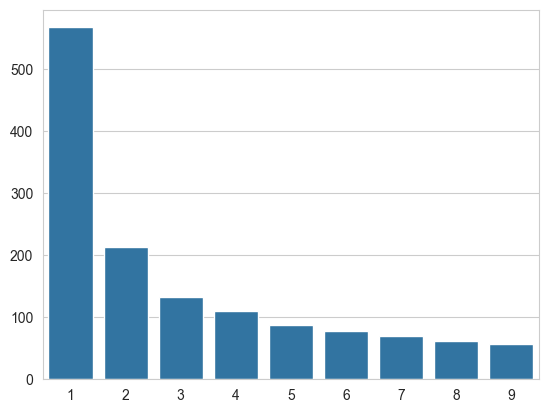

In [494]:
sns.barplot(elbow_data, x=range(1, 10), y=inertia)

# Menentukan Nilai K dengan Silhouette Method

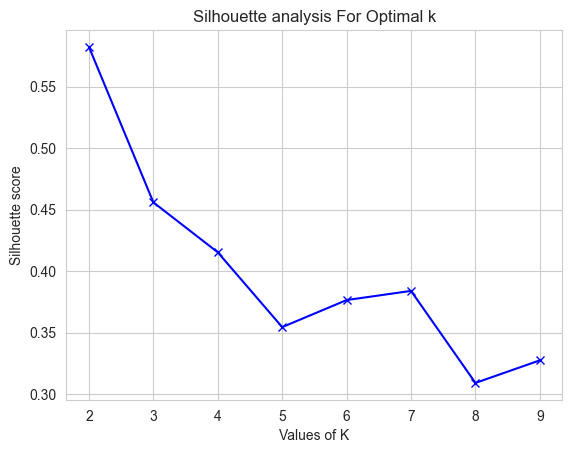

In [495]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(clean_iris_df)
    cluster_labels = kmeans.labels_
    #silhouette score
    silhouette_avg.append(silhouette_score(clean_iris_df, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [496]:
silhouette_data = pd.DataFrame({'K': range_n_clusters, 'Silhouette Score': silhouette_avg})
silhouette_data

,K,Silhouette Score
0,2,0.582168
1,3,0.455864
2,4,0.415285
3,5,0.354500
4,6,0.376483
5,7,0.383935
6,8,0.309155
7,9,0.327500


In [497]:
silhouette_scores = silhouette_score(clean_iris_df, kmeans.labels_)
print(silhouette_scores)

0.32750001653046107


<Axes: xlabel='K', ylabel='Silhouette Score'>

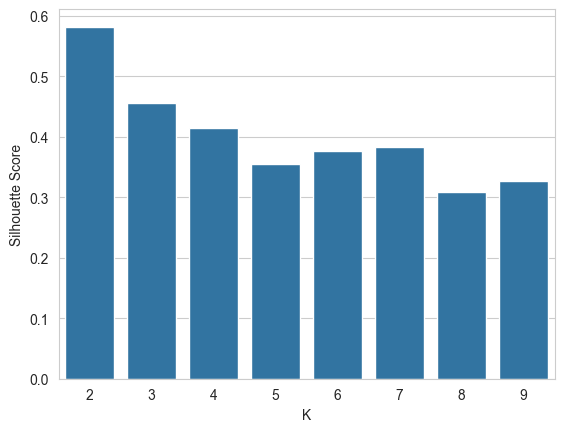

In [517]:
sns.barplot(silhouette_data, x='K', y='Silhouette Score')

# Nilai Silhouette Score tanpa Label

In [499]:
silhouette_scores

0.32750001653046107

In [500]:
inertia

[568.0,
 213.54302310095153,
 132.8716794050925,
 110.70870400096678,
 87.41587531128752,
 78.17186022287117,
 69.35513097417562,
 61.880703310307595,
 57.35891084954149]

In [501]:
print(kmeans.cluster_centers_)

[[-0.2316859  -0.97611295  0.16803349  0.03532902]
 [-0.6171923   1.93315583 -1.30978461 -1.24720222]
 [ 0.34215487 -0.84399745  0.79948364  0.82814055]
 [ 1.28663785  0.04560019  1.15773252  1.25757533]
 [ 2.08060823  1.5342723   1.47838547  1.33635307]
 [-1.18466068 -1.74478498 -0.53402246 -0.45785809]
 [ 0.59681794 -0.0553959   0.5306715   0.46610287]
 [-1.00643938  0.86802565 -1.33501378 -1.26169446]
 [-1.49707839  0.06632224 -1.39920542 -1.39252721]]


# Inisialisasi K-Means

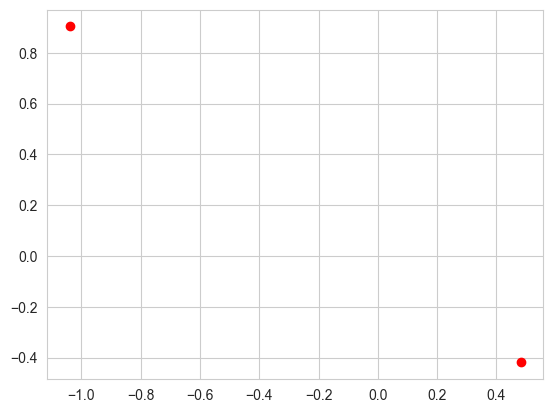

In [502]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(clean_iris_df)
y_kmeans = kmeans.fit_predict(clean_iris_df)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red")
plt.show()

# Feature Labels

In [503]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Menentukan titik centroid pada kmeans

In [504]:
print("List of Centroids")
kmeans.cluster_centers_

List of Centroids


array([[-1.03953762,  0.90387989, -1.34711658, -1.29162124],
       [ 0.48225972, -0.41932572,  0.62495099,  0.59920573]])

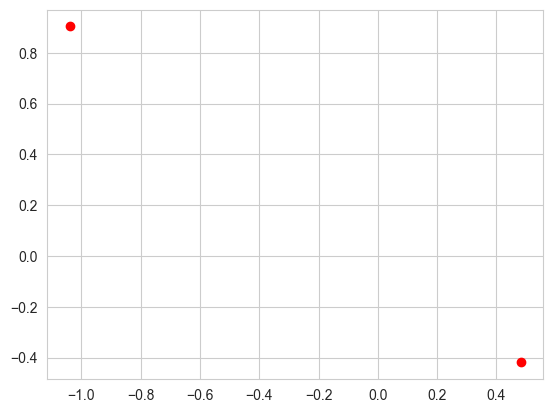

In [505]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", label="Centroids")

# Visualisasikan hasil klastering ke dalam Scatter Plot [Petal Width , Petal Length]

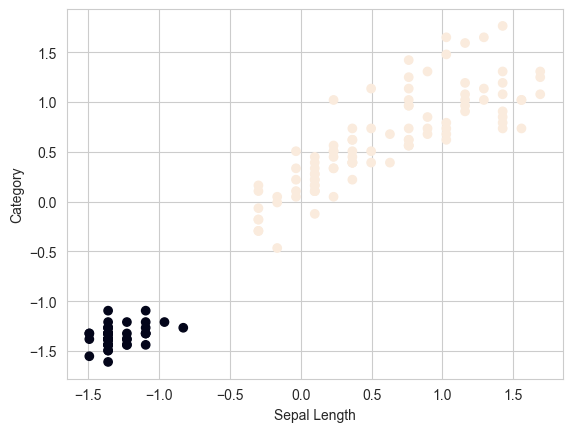

In [506]:
plt.scatter(clean_iris_df['PetalWidth'], clean_iris_df['PetalLength'], c=kmeans.labels_)
plt.xlabel("Sepal Length")
plt.ylabel("Category")
plt.show()

In [507]:
print("Centroid untuk setiap Features")
print(clean_iris_df.columns)
kmeans.cluster_centers_

Centroid untuk setiap Features
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')


array([[-1.03953762,  0.90387989, -1.34711658, -1.29162124],
       [ 0.48225972, -0.41932572,  0.62495099,  0.59920573]])

# Korelasi setiap label

In [508]:
clean_iris_df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.112386,0.871020,0.814127
SepalWidth,-0.112386,1.000000,-0.427052,-0.364079
PetalLength,0.871020,-0.427052,1.000000,0.960888
PetalWidth,0.814127,-0.364079,0.960888,1.000000


<Axes: >

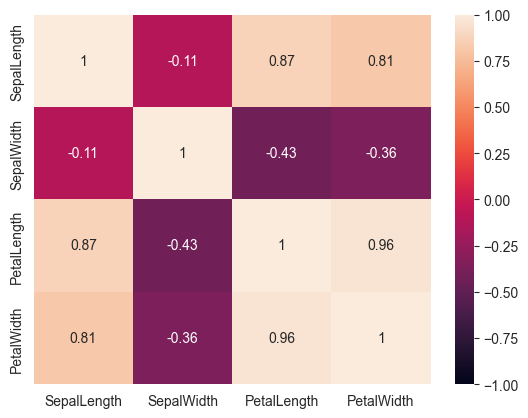

In [509]:
sns.heatmap(clean_iris_df.corr(), vmin=-1, vmax=1, annot=True)

# Mengambil semua baris matriks , dan ambil kolom ke 3 dan 2 untuk Petal Width dan Sepal Length

In [510]:
centroids_petalW = kmeans.cluster_centers_[:, 3]
centroids_sepalL = kmeans.cluster_centers_[:, 0]

# Mengambil klastering untuk atribut Petal Length dan Sepal Length

In [511]:
centroids_petalL = kmeans.cluster_centers_[:, 2]

# Visualisasikan hasil klastering ke dalam Scatter Plot dan Hist Plot [Petal Width , Sepal Length]

<Axes: xlabel='PetalWidth', ylabel='SepalLength'>

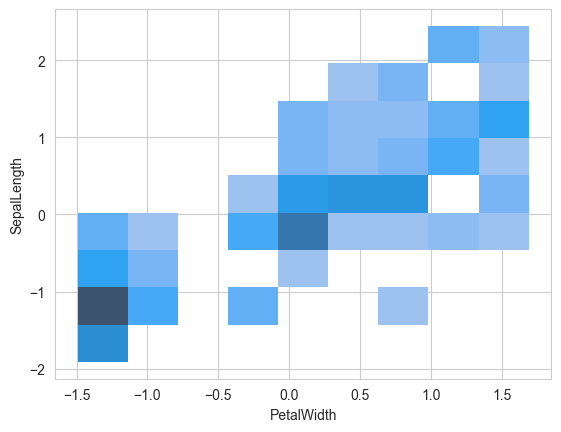

In [512]:
sns.set_style("whitegrid")
sns.histplot(x=clean_iris_df['PetalWidth'], y=clean_iris_df['SepalLength'])

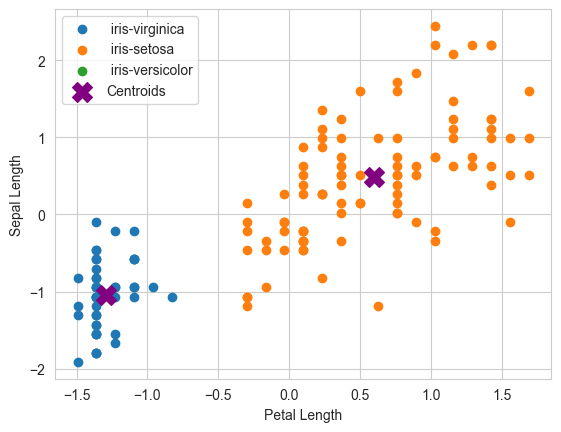

In [513]:
labels = {0: "iris-virginica", 1: "iris-setosa", 2: "iris-versicolor"}
for label, cluster_label in labels.items():
    plt.scatter(clean_iris_df['PetalWidth'][kmeans.labels_ == label],
                clean_iris_df['SepalLength'][kmeans.labels_ == label],
                label=f' {cluster_label}')
plt.scatter(centroids_petalW, centroids_sepalL, marker='X', s=200, color='purple', label='Centroids')
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend()
plt.show()

# Visualisasikan hasil klastering ke dalam Scatter Plot [Petal Length , Sepal Length]

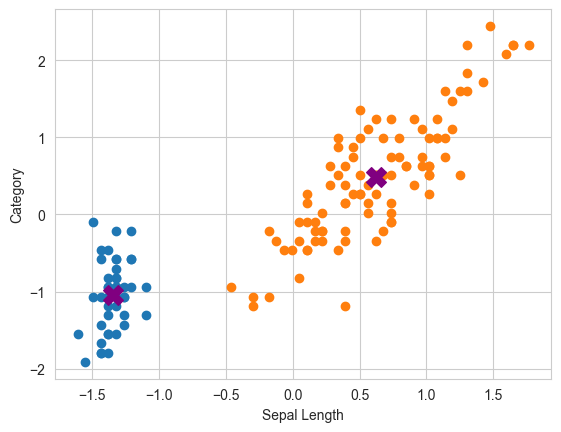

In [514]:
for label, cluster_label in labels.items():
    plt.scatter(clean_iris_df['PetalLength'][kmeans.labels_ == label],
                clean_iris_df['SepalLength'][kmeans.labels_ == label],
                label=f'Cluster {cluster_label}')
plt.scatter(centroids_petalL, centroids_sepalL, marker='X', s=200, color='purple', label='Centroids')
plt.xlabel("Sepal Length")
plt.ylabel("Category")
plt.show()

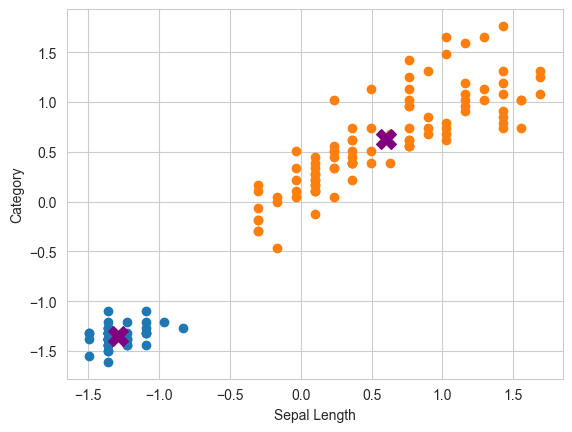

In [515]:
for label, cluster_label in labels.items():
    plt.scatter(clean_iris_df['PetalWidth'][kmeans.labels_ == label],
                clean_iris_df['PetalLength'][kmeans.labels_ == label],
                label=f'Cluster {cluster_label}')
plt.scatter(centroids_petalW, centroids_petalL, marker='X', s=200, color='purple', label='Centroids')
plt.xlabel("Sepal Length")
plt.ylabel("Category")
plt.show()